In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use("ggplot")
sns.set()

In [2]:
# iris is dataset having attributes of data,target,description,etc. in a dictionary form
iris = datasets.load_iris()
print(type(iris))
print(iris.keys())

# both are numpy arrays
print(type(iris.data), type(iris.target))

# 150 datapoints and 4 columns(sepal length,sepal width,pedal length,pedal width ) (all in cm)
# Remember that samples are in rows and features are in columns.
print(iris.data.shape)

# Target Variables-Species( 0->setosa,1->versicolor,2->virginica)
print(iris.target_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

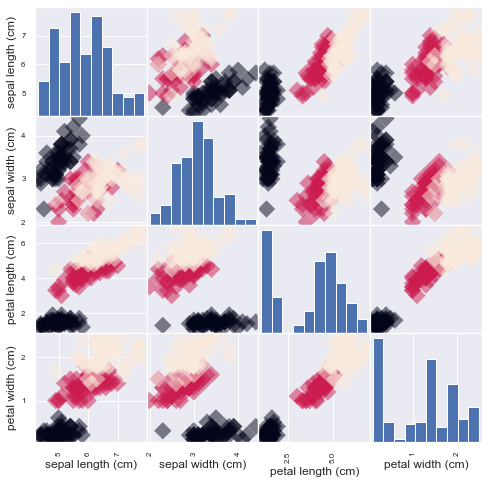

In [3]:
# Exploratory Data Analysis
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
display(df.head())
display(df.describe())
display(df.info())
#  Visual EDA
# params  (dataframe, c stands for color,)
# Figure will be colored by their species, List of figsize is the size of figure and marker size and shape
_ = pd.plotting.scatter_matrix(df, c=Y, figsize=[8, 8], s=150, marker="D")
# 3rd row 4th column represents that petal length and petal width are highly correlated

### The KNN Algorithm
- Initialize K to your chosen number of neighbors
- For each example in the data
- Calculate the distance between the query example and the current example from the data.
- Add the distance and the index of the example to an ordered collection
- Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
- Pick the first K entries from the sorted collection
- Get the labels of the selected K entries
- If regression, return the mean of the K labels
- If classification, return the mode of the K labels

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# KNN is a lazy or instance based algorithm
# larger k leads to smooth decision boundary and thus underfitting
# Smaller k leads to complex decision boundary and thus overfitting
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, Y)
X_New = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_New)
print("Prediction: {}".format(prediction))

Prediction: [1 1 0]


## Evaluation of model performance
<table style="width:50%">
    <caption style="font-size:1.3em">Confusion matrix</caption>
    <tr>
        <td></td>
        <th scope="col">Predicted: Spam Email</th>
        <th scope="col">Predicted: Real Email</th>
    </tr>
    <tr>
        <th scope="row">Actual: Spam Email</th>
        <td>True Positive</td>
        <td>False Negative</td>
    </tr>
    <tr>
        <th scope="row">Actual: Real Email</th>
        <td>False Positive</td>
        <td>True Negative</td>
    </tr>
</table>

- accuracy: $\frac{tp+tn}{tp+tn+fp+fn}$
- precision: $\frac{tp}{tp+fp}$
- recall: $\frac{tp}{tp+fn}$
- f1score: $\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$
#### High Precision: Not many real emails predicted as spam
#### High Recall: Predicted most spam emails correctly

## PIMA Indians dataset
- Here, we will work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. 
- The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies.
- Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [5]:
diabetes = pd.read_csv("./datasets/diabetes.csv")
display(diabetes.head())
X = diabetes.drop("Outcome", axis=1).values
Y = diabetes["Outcome"].values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Confusion Matrix

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       206
           1       0.62      0.44      0.52       102

    accuracy                           0.73       308
   macro avg       0.69      0.66      0.66       308
weighted avg       0.71      0.73      0.71       308



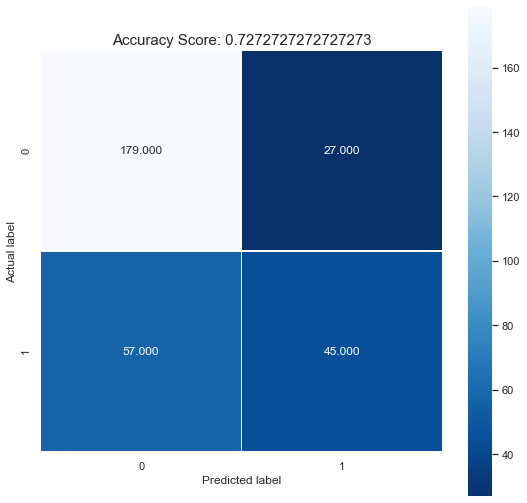

In [6]:
# - Class of interset :positive class(depends on problem)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42
)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# print(classification_report(y_test,y_pred))

display(Markdown(rf"""## Confusion Matrix"""))

score = knn.score(X_test, y_test)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)

print(classification_report(y_test, y_pred))

## Hyperparameter Tuning (Grid Search Cross-Validation)
$$
\bf{C = \frac{1}{\lambda}}
\begin{pmatrix}
\bf{0.5} & 0.701 & 0.703 & 0.697 \\ 
\bf{0.4} & 0.699 & 0.702 & 0.698 \\
\bf{0.3} & 0.699 & 0.726 & 0.713 \\
\ & \bf{0.1} & \bf{0.2} & \bf{0.3} \\
\end{pmatrix} 
$$
<div style="margin-left:52%;font-weight: bold">Alpha</div>

In [7]:
from sklearn.model_selection import GridSearchCV

# See the documentation for hyperparameter key name, value is list to be used in GridSearchCV
param_grid = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, Y)
print(knn_cv.best_params_)
# We see that the best Value for k is 14

{'n_neighbors': 14}
